In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from sklearn.neighbors import KDTree
from sklearn.datasets import make_blobs, make_moons
%matplotlib inline

In [2]:
# data = np.random.laplace(size=(200, 2))
# data, color = make_blobs(random_state=12, cluster_std=2.0)
data, color = make_moons(noise=0.1, random_state=12)
data = np.array([data[:,0], data[:,1], color]).T

In [3]:
data[0:10]

array([[ 0.57978283,  0.90411361,  0.        ],
       [-0.93532537,  0.62356764,  0.        ],
       [ 1.96099906,  0.07183735,  1.        ],
       [ 0.42812429,  0.86318812,  0.        ],
       [ 0.46085576, -0.32568043,  1.        ],
       [-0.59557661,  0.79611617,  0.        ],
       [ 1.82890856, -0.19672807,  1.        ],
       [ 0.55212165,  0.75821799,  0.        ],
       [ 0.31362121,  0.96467745,  0.        ],
       [ 0.15473492, -0.12283995,  1.        ]])

In [4]:
def get_next_gen(gen0data):
    kdt = KDTree(gen0data)
    def get_nni(point):
        dist, ind = kdt.query([point], k=3)
        return np.random.choice(ind[0,1:])
    def shuffle_coords(p0, p1):
        result = np.array([p0, p1])
        for i in range(len(p0)):
            result[:, i] = np.random.choice(result[:, i], size=2, replace=False)
        return result
    gen1data = gen0data.copy()
    shuffled_indices = set()
    for i, p0 in enumerate(gen1data):
        if i in shuffled_indices: next
        nni = get_nni(p0)
        p1 = gen1data[nni]
        gen1data[i], gen1data[nni] = shuffle_coords(p0, p1)
        shuffled_indices.update([i, nni])
    return gen1data

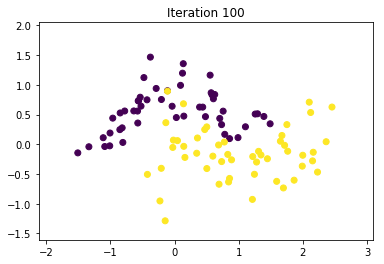

In [5]:
# https://matplotlib.org/examples/animation/moviewriter.html
IMWriter = manimation.writers.avail['imagemagick']
writer = IMWriter(fps=10, metadata={'title':'Moon Test'})

d = data

fig = plt.figure()
scatter = plt.scatter(d[:, 0], d[:, 1], c=d[:,2])
plt.title('Iteration 0')

plt.xlim(d[:,0].min() - 1, d[:,0].max() + 1)
plt.ylim(d[:,1].min() - 1, d[:,1].max() + 1)
with writer.saving(fig, "images/moon_scatter_with_laplace_noise.gif", 100):
    for i in range(1, 101):
        d = get_next_gen(d)
        d = d.copy()
        d[:,0] += np.random.laplace(scale=0.02,size=d[:,0].shape)
        d[:,1] += np.random.laplace(scale=0.02,size=d[:,1].shape)
        scatter.remove()
        scatter = plt.scatter(d[:, 0], d[:, 1], c=d[:,2])
        plt.title('Iteration {}'.format(i))
        writer.grab_frame()